<a href="https://colab.research.google.com/github/AlexandraPotekhina/VKR_Final/blob/main/VKR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.inspection import permutation_importance

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

RANDOM_STATE = 42

Считываем базы данных и проверяем их размерность.

In [2]:
df_bp = pd.read_excel('/content/drive/MyDrive/X_bp.xlsx')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_nup = pd.read_excel('/content/drive/MyDrive/X_nup.xlsx')

In [4]:
print(df_bp.shape)
print(df_nup.shape)

(1023, 11)
(1040, 4)


Датасет состоит из двух файлов - df_bp (составляющая из базальтопластика) и df_nup (составляющая из углепластика). В рамках задачи необходоимо провести объединение по индексу типа INNER.

In [5]:
df = pd.concat([df_bp, df_nup], axis=1, join='inner')

In [6]:
print(df.shape)

(1023, 15)


In [7]:
df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,0.0,4.0,57.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1.0,0.0,4.0,60.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2.0,0.0,4.0,70.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3.0,0.0,5.0,47.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4.0,0.0,5.0,57.0


Удаляем колонки с индексами.

In [8]:
df=df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


Проверяем наличие/отсутствие нулевых значений.

In [10]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Проверяем наличие/отсутствие повторяющихся значений.

In [12]:
df.duplicated().sum()

0

Приведем описательную статистику.

In [13]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


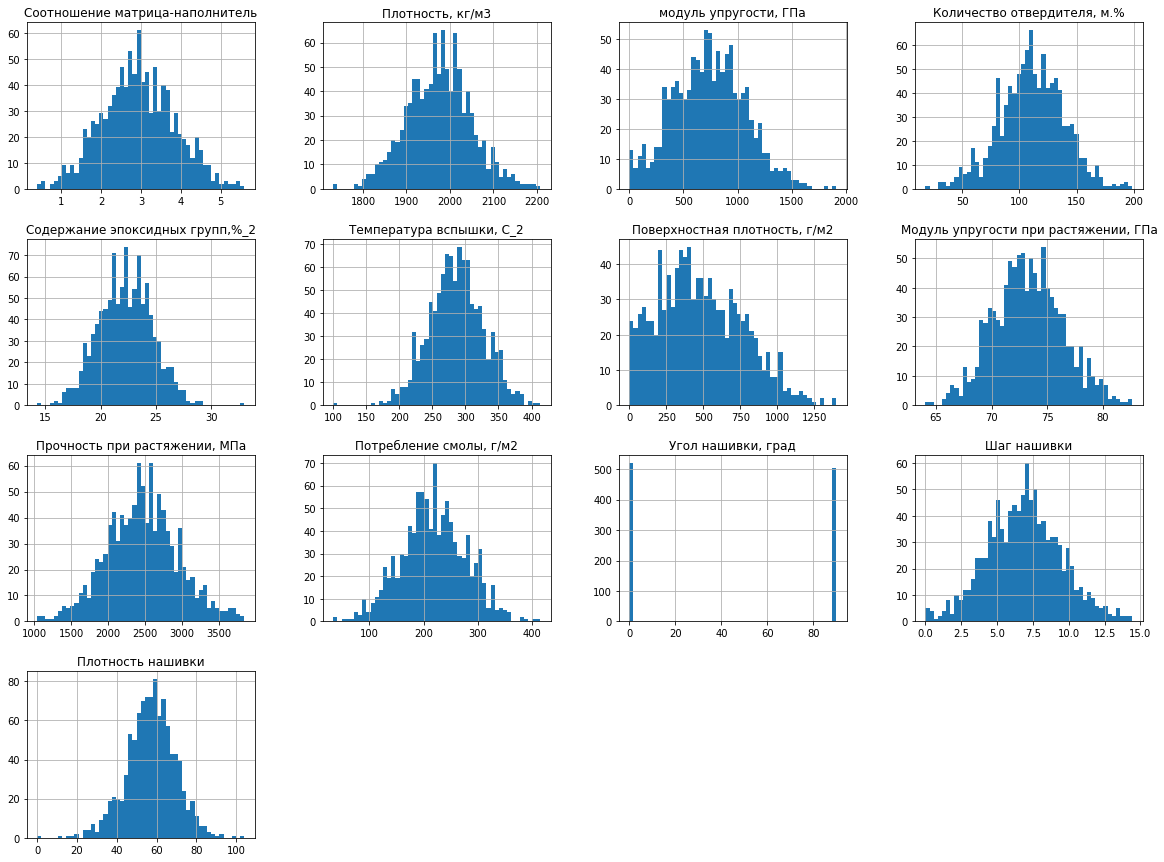

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Данные преимущественно имеют нормальное распределение, за исключением угла нашивки, относящегося к категориальным признакам.

Проверим наличие выбросов.

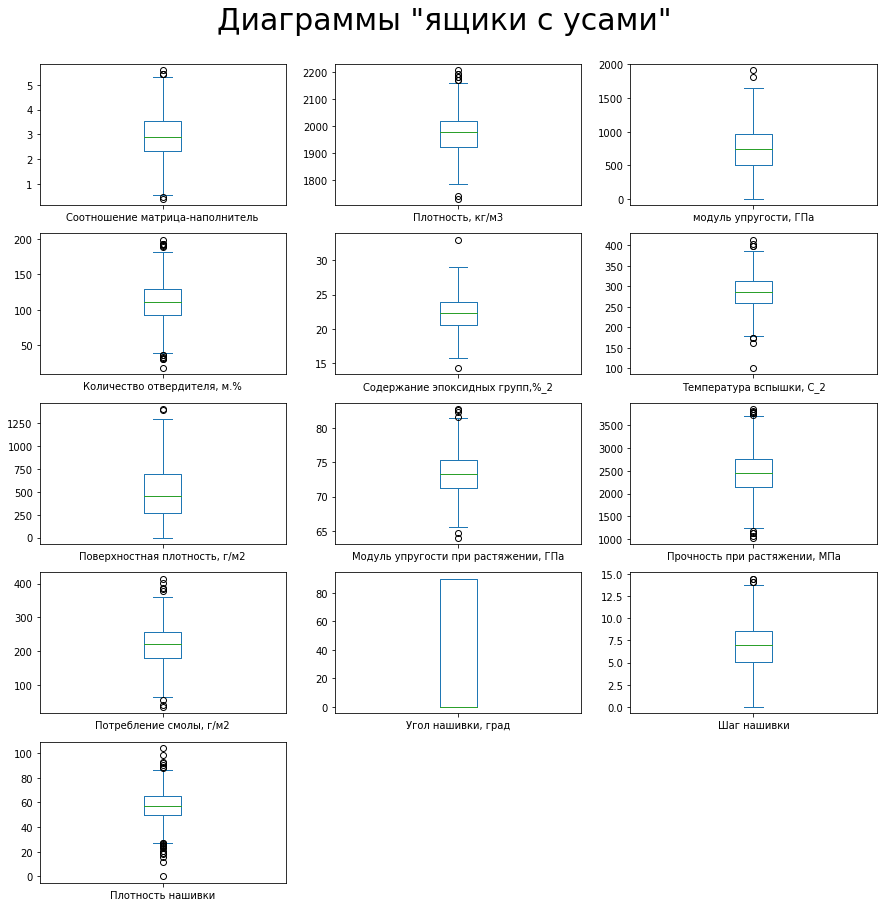

In [15]:
fig = plt.figure(figsize=(15,40))
fig.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
total_axes = len(df.columns) 
subplt = 1 
for x in df.columns:
    ax = fig.add_subplot(total_axes, 3, subplt)
    df[x].plot(kind="box")
   
    subplt+=1

plt.show()

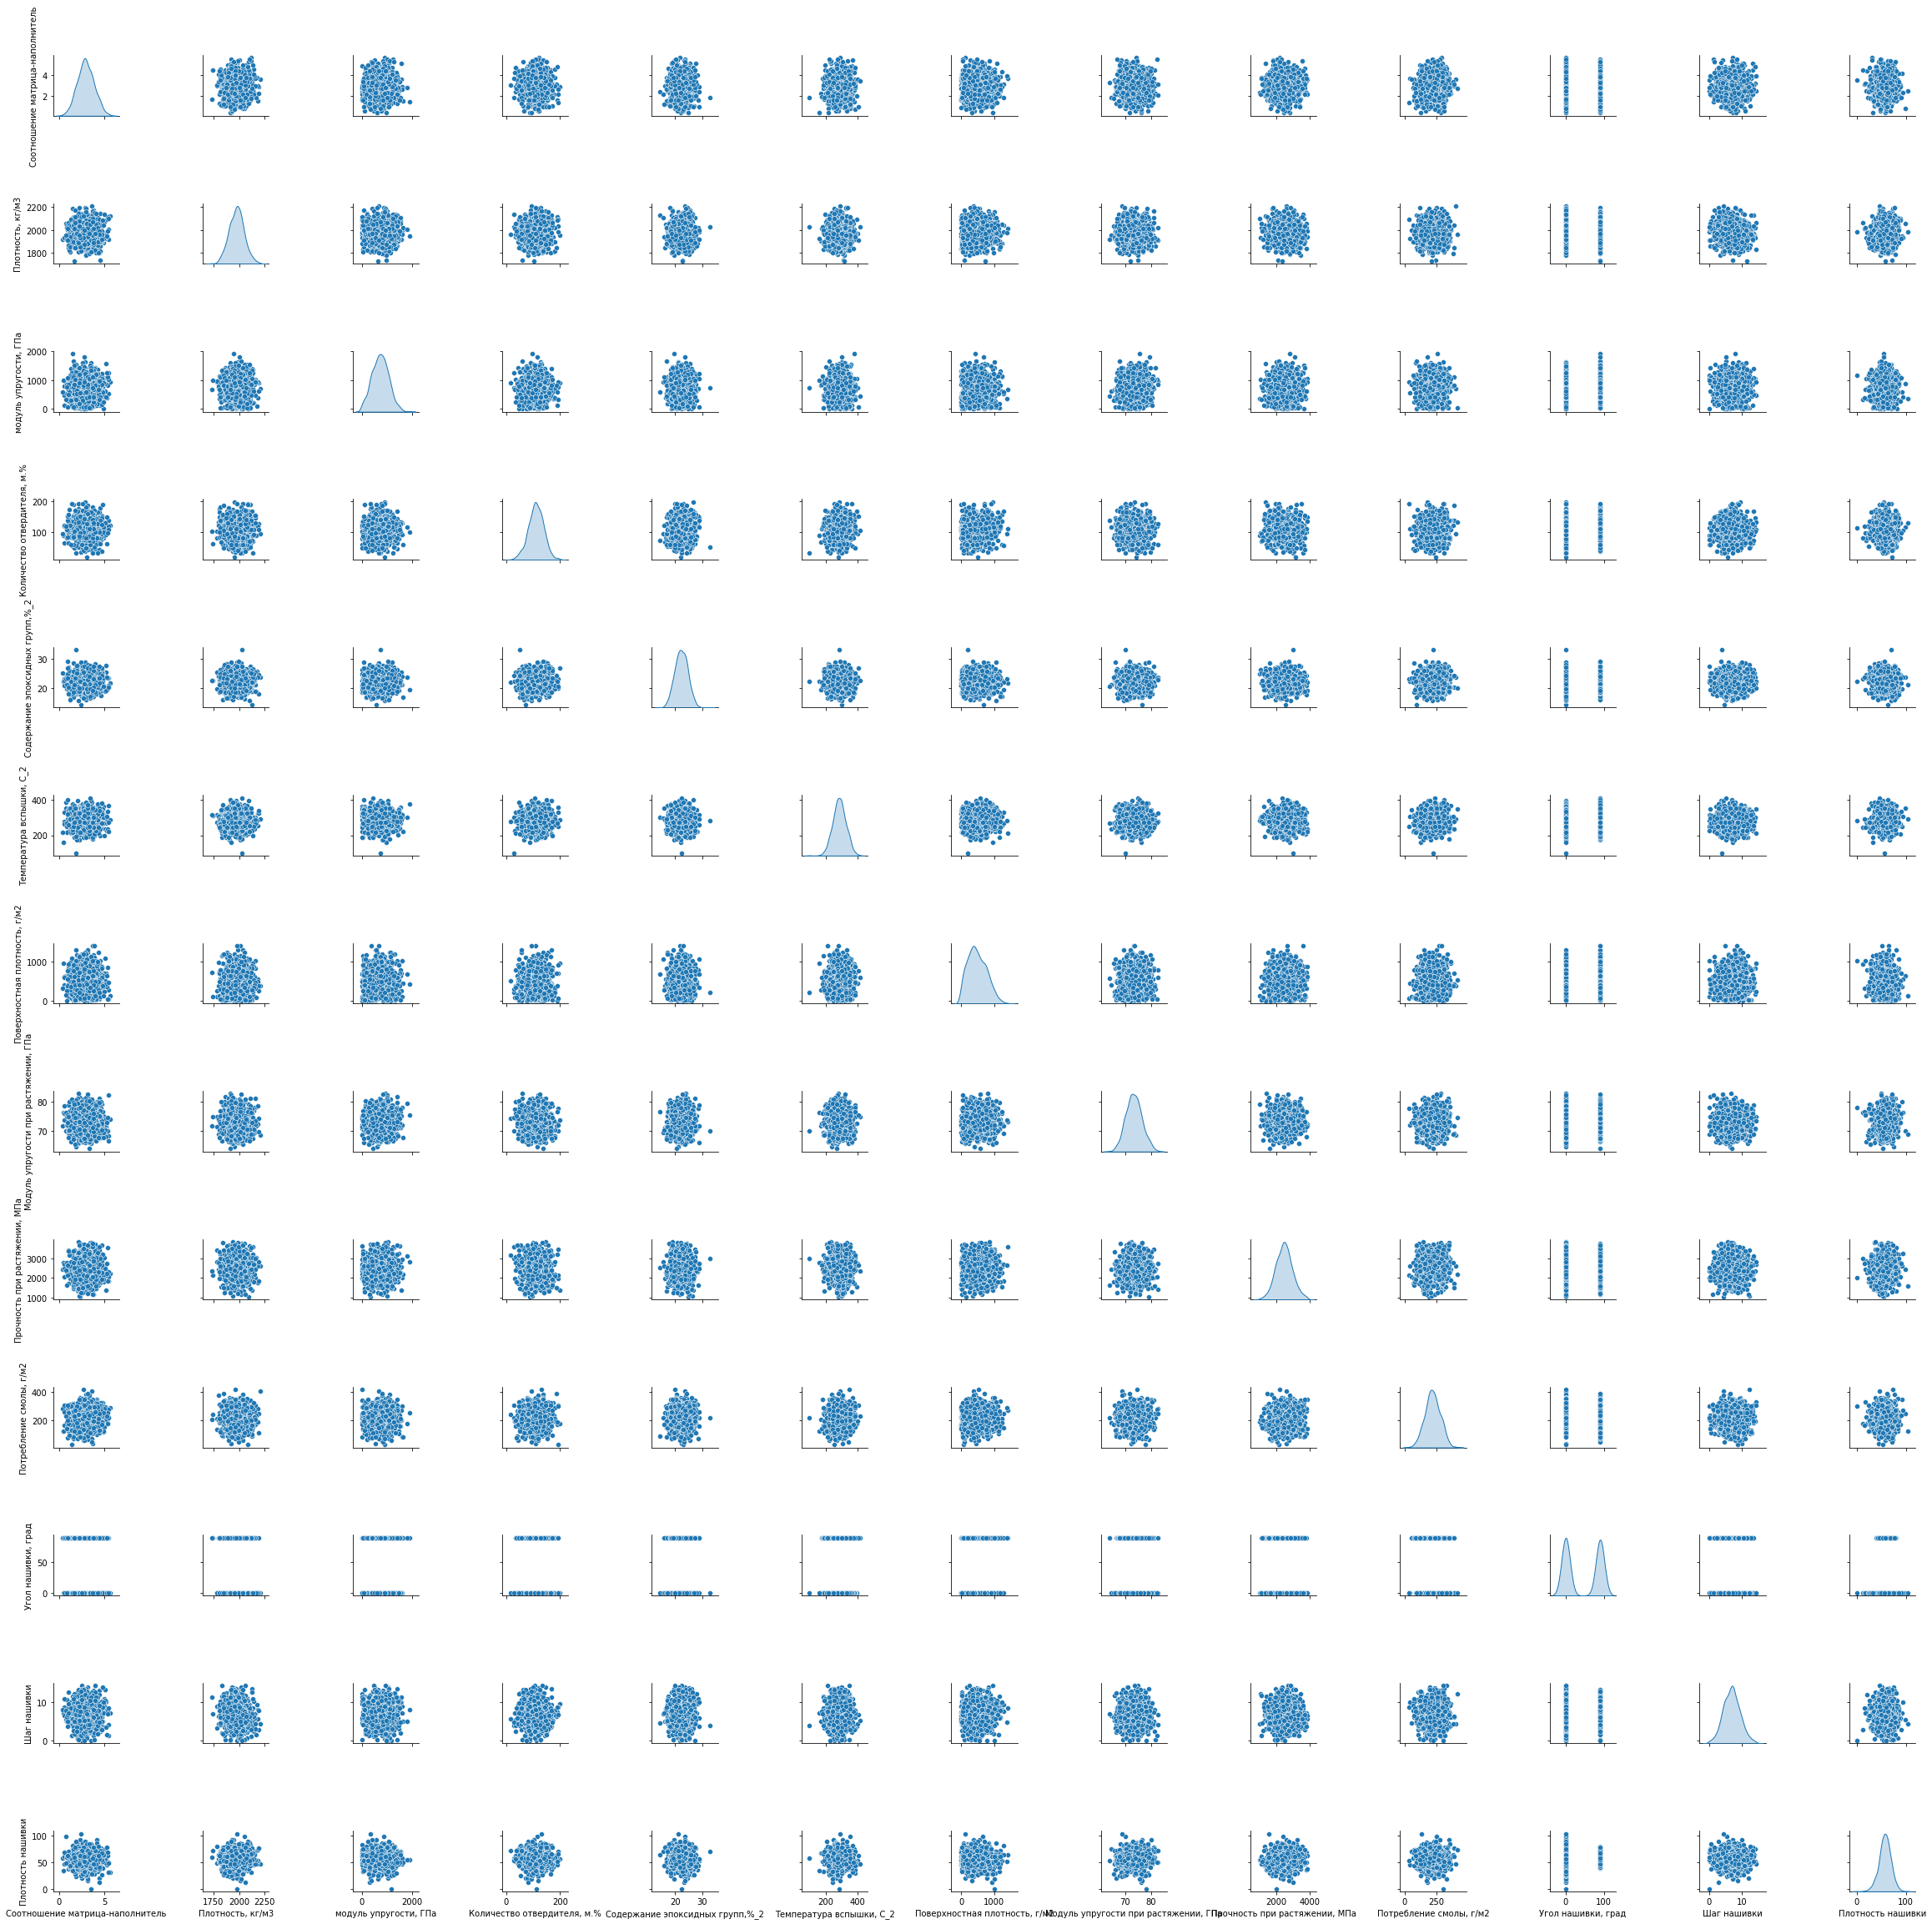

In [16]:
sns.pairplot(df[df.columns], diag_kind='kde')

In [17]:
df.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


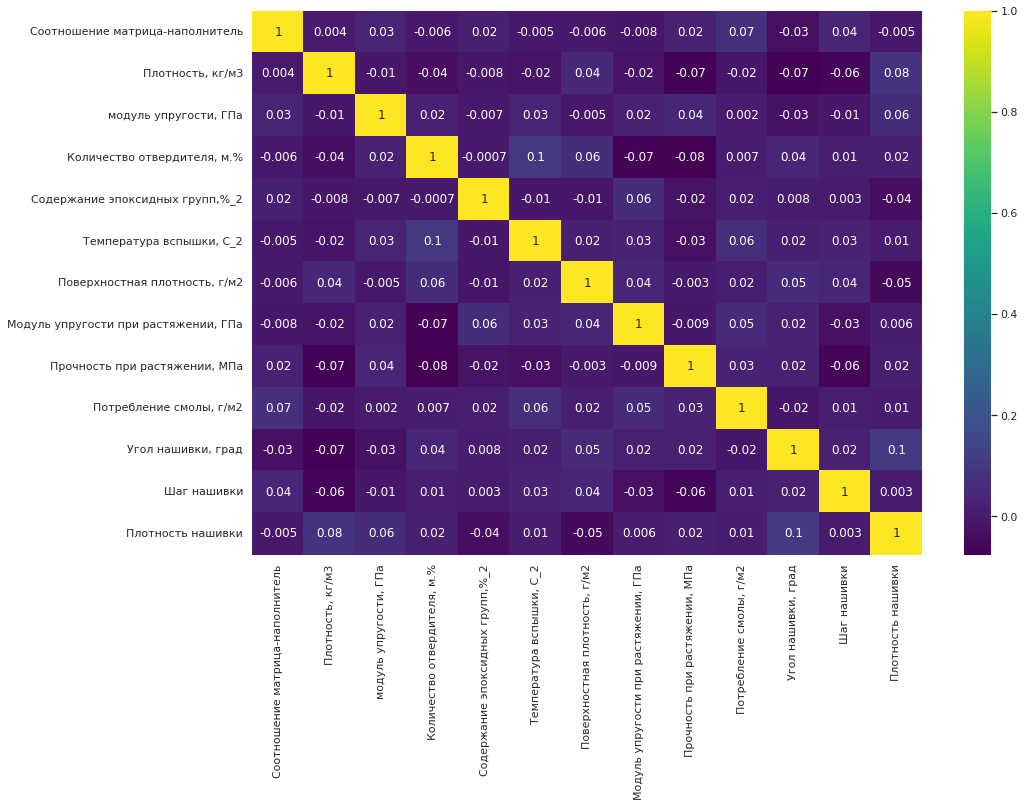

In [18]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap = 'viridis')

Попарные графики распределений и тепловая карта показывает отсутствие сильных линейных зависимостей среди показателей. Однако зависимости могут носить и нелинейный характер, например, при увеличении значений одного показателя, значения другого могут стремится к нулю и т.д.

Определяем выбросы методом 3-х сигм и заменяем их на нулевые значения.

In [19]:
for x in ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
          'модуль упругости, ГПа', 'Количество отвердителя, м.%',
          'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
          'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
          'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
          'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

Проверяем количество выбросов.

In [20]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Количество выбросов незначительно. Можно просто избавиться от них, однако я предпочла заменить их на медианные показатели, так как наш датасет сравнительно небольшой.

In [21]:
df = df.fillna(df.median())

In [ ]:
#df = df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Нормализуем значения.

In [23]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

Построим модели для предсказания прочности при растяжении, МПа. Посмотрим, с какими показателями он коррелирует и выберем на этом основании кол-во компонент для PCA.

In [24]:
correlation_matrix = df.corr()

In [25]:
correlation_matrix['Прочность при растяжении, МПа'].sort_values(ascending=False)

Прочность при растяжении, МПа           1.000000
Соотношение матрица-наполнитель         0.032497
Угол нашивки, град                      0.032393
Потребление смолы, г/м2                 0.031482
модуль упругости, ГПа                   0.028758
Плотность нашивки                       0.019343
Модуль упругости при растяжении, ГПа    0.007377
Температура вспышки, С_2               -0.004053
Содержание эпоксидных групп,%_2        -0.010974
Поверхностная плотность, г/м2          -0.025072
Шаг нашивки                            -0.060421
Плотность, кг/м3                       -0.066886
Количество отвердителя, м.%            -0.071126
Name: Прочность при растяжении, МПа, dtype: float64

In [26]:
y_pr = df_norm['Прочность при растяжении, МПа']
X_pr = df_norm.drop(['Прочность при растяжении, МПа'], axis = 1)

In [27]:
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X_pr, y_pr, test_size = 0.30, random_state=42)

print(X_train_pr.shape)
print(y_train_pr.shape)
print(X_test_pr.shape)
print(y_test_pr.shape)

(716, 12)
(716,)
(307, 12)
(307,)


In [44]:
#!pip install mlxtend
#from sklearn.feature_selection import SequentialFeatureSelector as sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
#lin_reg = LinearRegression()

#feature_names = np.array(df_norm.columns)

#sfs1 = sfs(lin_reg, n_features_to_select=4, scoring='neg_root_mean_squared_error')
#sfs1 = sfs1.fit(X_train_pr, y_train_pr)

#print(feature_names[sfs1.get_support(indices=True)])

['Плотность, кг/м3' 'модуль упругости, ГПа' 'Количество отвердителя, м.%'
 'Шаг нашивки']


In [29]:
from sklearn.decomposition import PCA
pca = PCA(.90)

In [30]:
pca.fit(X_train_pr)

PCA(n_components=0.9)

In [31]:
X_train_pr = pca.transform(X_train_pr)
X_test_pr = pca.transform(X_test_pr)

Для определения качества моделей нам потребуется базовая модель, предсказывающая среднее значение. В качестве такой модели будем использовать DummyRegressor. Модель будет выдавать прогноз, построенный на повторении среднего показателя по множеству.

In [32]:
#Dummy Regressor

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train_pr, y_train_pr)

y_pred = dummy_reg.predict(X_test_pr)

mse_test = mean_squared_error(y_pred, y_test_pr)
rmse_test = np.sqrt(mse_test)

print("The root mean squared error (RMSE) on test set:", rmse_test)

The root mean squared error (RMSE) on test set: 0.18790418429613095


In [33]:
#Linear regression

lin_reg = LinearRegression()

all_accuracies = cross_val_score(estimator=lin_reg, X=X_train_pr, y=y_train_pr, scoring="neg_root_mean_squared_error", cv=5)

print(-all_accuracies)
print(-all_accuracies.mean())

grid_param = {
    'fit_intercept' : ['True', 'False']
}

gd_sr_lin_reg = GridSearchCV(estimator=lin_reg,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=10,
                     n_jobs=-1)

gd_sr_lin_reg.fit(X_train_pr, y_train_pr)

best_parameters = gd_sr_lin_reg.best_params_
print(best_parameters)

best_result = gd_sr_lin_reg.best_score_
print(-best_result)

[0.20719691 0.20574566 0.18381152 0.18605932 0.18025702]
0.19261408587274997
{'fit_intercept': 'True'}
0.19236749362546393


In [34]:
#Gradient Boosting

gbr = GradientBoostingRegressor(max_depth=4, n_estimators=20, min_samples_split=5, learning_rate=0.1)

all_accuracies = cross_val_score(estimator=gbr, X=X_train_pr, y=y_train_pr, scoring="neg_root_mean_squared_error", cv=5)

print(-all_accuracies)
print(-all_accuracies.mean())

grid_param = {
    'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [30,50,70],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [3, 10, 30],
    'learning_rate': [0.01,0.05,0.1,1,0.5]
}

gd_sr_gbr = GridSearchCV(estimator=gbr,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=10,
                     n_jobs=-1)

gd_sr_gbr.fit(X_train_pr, y_train_pr)

best_parameters = gd_sr_gbr.best_params_
print(best_parameters)

best_result = gd_sr_gbr.best_score_
print(-best_result)

[0.20882517 0.20681946 0.19240343 0.18960629 0.19128171]
0.1977872093582142
{'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 70, 'min_samples_split': 2, 'n_estimators': 3}
0.18949866704410875


In [ ]:
#Random Forest Regressor

rfr = RandomForestRegressor(max_features=1, max_leaf_nodes=20, n_estimators=10, n_jobs=-1)

all_accuracies = cross_val_score(estimator=rfr, X=X_train_pr, y=y_train_pr, scoring="neg_root_mean_squared_error", cv=5)

print(-all_accuracies)
print(-all_accuracies.mean())

grid_param = {
    'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [3, 10, 30]
}

gd_sr_rfr = GridSearchCV(estimator=rfr,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=10,
                     n_jobs=-1)

gd_sr_rfr.fit(X_train_pr, y_train_pr)

best_parameters = gd_sr_rfr.best_params_
print(best_parameters)

best_result = gd_sr_rfr.best_score_
print(-best_result)

[0.20866361 0.20454441 0.19070135 0.18690662 0.18417978]
0.19499915555316824
{'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 70, 'min_samples_split': 5, 'n_estimators': 10}
0.19049733966874632


Выведем результаты на тестовой выборке и сравним модели.

In [ ]:
def get_metrics(model):
    predicted = model.predict(X_test_pr) 
    return (
            mean_absolute_error(predicted, y_test_pr), 
            np.sqrt(mean_squared_error(predicted, y_test_pr))
           )
                      
models_res = [get_metrics(dummy_reg), get_metrics(gd_sr_lin_reg), get_metrics(gd_sr_gbr), get_metrics(gd_sr_rfr)]
res_data = {'Модель': ['Dummy Regressor', 'Linear Regression', 'GradientBoostingRegressor', 'RandomForestRegressor',], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'root_mean_squared_error'  : [model_res[1] for model_res in models_res]
}
pd.DataFrame(res_data)

,Модель,mean_absolute_error,root_mean_squared_error
0,Dummy Regressor,0.150903,0.187904
1,Linear Regression,0.149633,0.187408
2,GradientBoostingRegressor,0.151169,0.187973
3,RandomForestRegressor,0.149687,0.187922


Модели неудовлетворительно описывают зависимость.  

Посмотрим, какие признаки были наиболее важны для предсказания результата (feature importance) на примере GradientBoostingRegressor. Мы можем вывести эти признаки с помощью любой модели, основанной на деревьях решений. Также посмотрим на Permutation importance. Данный алгоритм считается признак «важным», если его перетасовка снижает точность модели и увеличивает ошибку. С другой стороны, признак считается «неважным», если перетасовка его значений не влияет на точность модели.


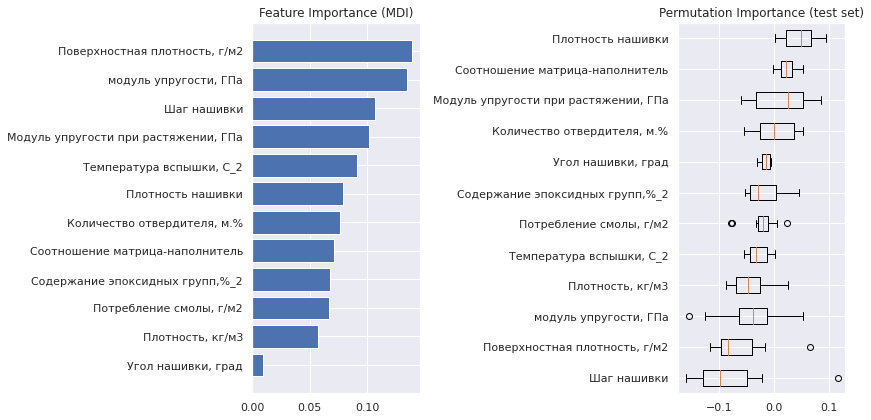

In [28]:
#Permutation importance

gbr = GradientBoostingRegressor(max_depth=50, n_estimators=3, min_samples_split=5, learning_rate=0.5)
gbr.fit(X_train_pr, y_train_pr)

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_pr.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gbr, X_test_pr, y_test_pr, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train_pr.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Можно выделить несколько признаков, наиболее важных для предсказания: . Изменим нашу выборку на новую, включающюю только важные признаки и обучим модели заново.

In [ ]:
y_pr_1 = df_norm['Прочность при растяжении, МПа']
X_pr_1 = df_norm[['Плотность, кг/м3', 'Температура вспышки, С_2', 'Потребление смолы, г/м2']]
X_train_pr_1, X_test_pr_1, y_train_pr_1, y_test_pr_1 = train_test_split(X_pr_1, y_pr_1, test_size = 0.30, random_state=42)

gbr.fit(X_train_pr_1, y_train_pr_1)

y_pred = gbr.predict(X_test_pr_1)

print(mean_absolute_error(y_pred, y_test_pr_1)) 
print(np.sqrt(mean_squared_error(y_pred, y_test_pr_1)))


0.15297637589028235
0.1902821749207551


Результат существенно не изменился. Возможно, для сильных моделей этот результат позволил бы сократить кол-во используемых для предсказания параметров и таким образом оптимизировать модель.

Построим модели для предсказания модуля упругости при растяжении, МПа. Посмотрим, с какими показателями он коррелирует и выберем на этом основании кол-во компонент для PCA.

In [ ]:
correlation_matrix['Модуль упругости при растяжении, ГПа'].sort_values(ascending=False)

Модуль упругости при растяжении, ГПа    1.000000
Потребление смолы, г/м2                 0.059908
Содержание эпоксидных групп,%_2         0.057578
Поверхностная плотность, г/м2           0.039749
Угол нашивки, град                      0.029302
Температура вспышки, С_2                0.013182
Прочность при растяжении, МПа           0.007377
Плотность нашивки                       0.007295
модуль упругости, ГПа                  -0.000026
Соотношение матрица-наполнитель        -0.004228
Плотность, кг/м3                       -0.009494
Шаг нашивки                            -0.011244
Количество отвердителя, м.%            -0.055297
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [ ]:
y_upr = df_norm['Модуль упругости при растяжении, ГПа']
X_upr = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis = 1)

In [ ]:
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(X_upr, y_upr, test_size = 0.30, shuffle = True, random_state=42)

print(X_train_upr.shape)
print(y_train_upr.shape)
print(X_test_upr.shape)
print(y_test_upr.shape)

(716, 12)
(716,)
(307, 12)
(307,)


In [ ]:
pca.fit(X_train_upr)
X_train_upr = pca.transform(X_train_upr)
X_test_upr = pca.transform(X_test_upr)

In [ ]:
#Dummy Regressor

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train_upr, y_train_upr)

y_pred = dummy_reg.predict(X_test_upr)

mse_test = mean_squared_error(y_pred, y_test_upr)
rmse_test = np.sqrt(mse_test)

print("The root mean squared error (RMSE) on test set:", rmse_test)

The root mean squared error (RMSE) on test set: 0.19493499926284638


In [ ]:
#Linear regression

lin_reg = LinearRegression()

all_accuracies = cross_val_score(estimator=lin_reg, X=X_train_upr, y=y_train_upr, scoring="neg_root_mean_squared_error", cv=5)

print(-all_accuracies)
print(-all_accuracies.mean())

grid_param = {
    'fit_intercept' : ['True', 'False']
}

gd_sr_lin_reg = GridSearchCV(estimator=lin_reg,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=10,
                     n_jobs=-1)

gd_sr_lin_reg.fit(X_train_upr, y_train_upr)

best_parameters = gd_sr_lin_reg.best_params_
print(best_parameters)

best_result = gd_sr_lin_reg.best_score_
print(-best_result)

[0.1896601  0.1958481  0.18536051 0.20292945 0.18829801]
0.1924192329946546
{'fit_intercept': 'True'}
0.1924192329946546


In [ ]:
#Gradient Boosting

gbr = GradientBoostingRegressor(max_depth=4, n_estimators=20, min_samples_split=5, learning_rate=0.1)

all_accuracies = cross_val_score(estimator=gbr, X=X_train_upr, y=y_train_upr, scoring="neg_root_mean_squared_error", cv=5)

print(-all_accuracies)
print(-all_accuracies.mean())

grid_param = {
    'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [30,50,70],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [3, 10, 30],
    'learning_rate': [0.01,0.05,0.1,1,0.5]
}

gd_sr_gbr = GridSearchCV(estimator=gbr,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=10,
                     n_jobs=-1)

gd_sr_gbr.fit(X_train_upr, y_train_upr)

best_parameters = gd_sr_gbr.best_params_
print(best_parameters)

best_result = gd_sr_gbr.best_score_
print(-best_result)

[0.19747741 0.20351255 0.19113777 0.20301849 0.19137454]
0.197304150620823
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 10}
0.18987505364614932


In [ ]:
#Random Forest Regressor

rfr = RandomForestRegressor(max_features=1, max_leaf_nodes=30, n_estimators=50, n_jobs=-1)

all_accuracies = cross_val_score(estimator=rfr, X=X_train_upr, y=y_train_upr, scoring="neg_root_mean_squared_error", cv=5)

print(-all_accuracies)
print(-all_accuracies.mean())

grid_param = {
    'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [3, 10, 30]
}

gd_sr_rfr = GridSearchCV(estimator=rfr,
                     param_grid=grid_param,
                     scoring='neg_root_mean_squared_error',
                     cv=10,
                     n_jobs=-1)

gd_sr_rfr.fit(X_train_upr, y_train_upr)

best_parameters = gd_sr_rfr.best_params_
print(best_parameters)

best_result = gd_sr_rfr.best_score_
print(-best_result)

[0.19308558 0.19366336 0.18826499 0.2044288  0.1894964 ]
0.19378782407016615
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 70, 'min_samples_split': 10, 'n_estimators': 10}
0.19047757159775974


In [ ]:
def get_metrics(model):
    predicted = model.predict(X_test_upr) 
    return (
            mean_absolute_error(predicted, y_test_upr), 
            np.sqrt(mean_squared_error(predicted, y_test_upr))
           )
                      
models_res = [get_metrics(dummy_reg), get_metrics(gd_sr_lin_reg), get_metrics(gd_sr_gbr), get_metrics(gd_sr_rfr)]
res_data = {'Модель': ['Dummy Regression', 'Linear Regression', 'GradientBoostingRegressor', 'RandomForestRegressor',], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'root_mean_squared_error'  : [model_res[1] for model_res in models_res]
}
pd.DataFrame(res_data)

,Модель,mean_absolute_error,root_mean_squared_error
0,Dummy Regression,0.157540,0.194935
1,Linear Regression,0.157768,0.194779
2,GradientBoostingRegressor,0.158412,0.195581
3,RandomForestRegressor,0.156706,0.194089


Модели по-прежнему плохо описывают зависимости.

Снова посмотрим на feature importances и Permutation importances. Выделим наиболее важные признаки.

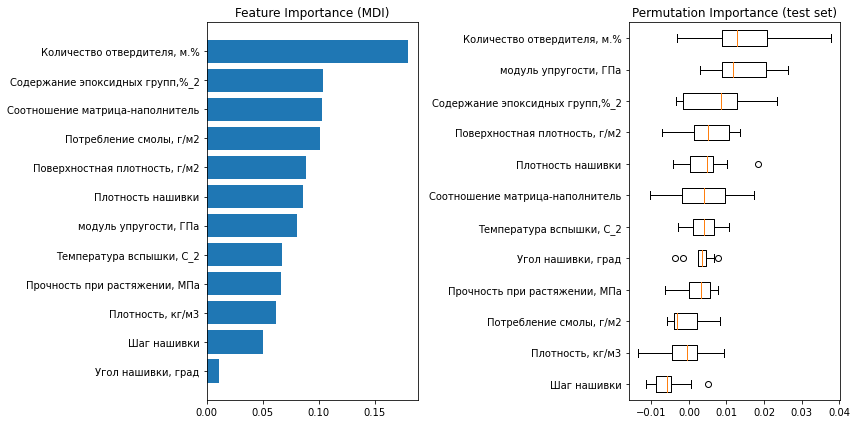

In [ ]:
#Permutation importance

gbr = GradientBoostingRegressor(max_depth=10, n_estimators=3, min_samples_split=5, learning_rate=0.1)
gbr.fit(X_train_upr, y_train_upr)

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train_upr.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gbr, X_test_upr, y_test_upr, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train_upr.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
y_upr_1 = df_norm['Модуль упругости при растяжении, ГПа']
X_upr_1 = df_norm[['модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2']]
X_train_upr_1, X_test_upr_1, y_train_upr_1, y_test_upr_1 = train_test_split(X_upr_1, y_upr_1, test_size = 0.30, random_state=42)

gd_sr_gbr.fit(X_train_upr_1, y_train_upr_1)

y_pred = gd_sr_gbr.predict(X_test_upr_1)

print(mean_absolute_error(y_pred, y_test_upr_1)) 
print(np.sqrt(mean_squared_error(y_pred, y_test_upr_1)))

0.15822969026917638
0.19535547108562534


Результат существенно не изменился.

Создадим нейронную сеть для прогноза соотношения матрица-наполнитель.

In [ ]:
#Neural Network

y_mn = df_norm['Соотношение матрица-наполнитель']
X_mn = df_norm.drop(['Соотношение матрица-наполнитель'], axis = 1)

In [ ]:
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X_mn, y_mn, test_size = 0.30, shuffle = True, random_state=42)

print(X_train_mn.shape)
print(y_train_mn.shape)
print(X_test_mn.shape)
print(y_test_mn.shape)

(716, 12)
(716,)
(307, 12)
(307,)


Создадим функцию, которая будет строить и компилировать модель Keras с учетом набора гиперпараметров. Начнем с одного скрытого слоя. МЛП с одним скрытым слоем теоретически может моделировать даже самые сложные функции, если в нем достаточно нейронов.

In [ ]:
def build_model(n_hidden=2, n_neurons=60, learning_rate=3e-3, input_shape=X_train_mn.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="selu", kernel_initializer="lecun_normal"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mean_absolute_error", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [ ]:
model_mn = build_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                780       
                                                                 
 batch_normalization (BatchN  (None, 60)               240       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 batch_normalization_1 (Batc  (None, 60)               240       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 60)                0

Epoch 1/100
23/23 [==============================] - 2s 18ms/step - loss: 1.5089 - root_mean_squared_error: 1.9262 - val_loss: 0.2866 - val_root_mean_squared_error: 0.3511
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 1.3049 - root_mean_squared_error: 1.6617 - val_loss: 0.2569 - val_root_mean_squared_error: 0.3196
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 1.1689 - root_mean_squared_error: 1.5047 - val_loss: 0.3080 - val_root_mean_squared_error: 0.3757
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 1.0652 - root_mean_squared_error: 1.3471 - val_loss: 0.3021 - val_root_mean_squared_error: 0.3641
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.9970 - root_mean_squared_error: 1.2645 - val_loss: 0.2874 - val_root_mean_squared_error: 0.3483
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.9250 - root_mean_squared_error: 1.1641 - val_loss: 0.2847 - val_root_

<function matplotlib.pyplot.show>

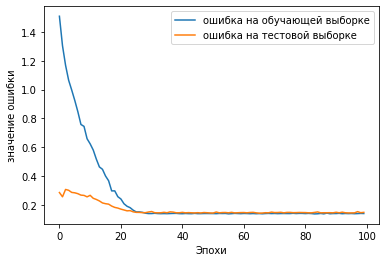

In [ ]:
history = model_mn.fit(X_train_mn, y_train_mn, epochs=100, validation_data=(X_test_mn, y_test_mn))
print(history.history.keys())

plt.plot(history.history['loss'],
         label = 'ошибка на обучающей выборке')
plt.plot(history.history['val_loss'],
         label = 'ошибка на тестовой выборке')
plt.xlabel('Эпохи')
plt.ylabel('значение ошибки')
plt.legend()
plt.show

Если ошибка на обучающей выборке значительно меньше, чем на тестовой, модель, вероятно, переобучается, либо есть несоответствие данных между выборками. В нашей модели разница незначительна, значит переобучения скорее всего нет.

In [ ]:
model_mn.evaluate(X_test_mn, y_test_mn)

10/10 [==============================] - 0s 4ms/step - loss: 0.1572 - root_mean_squared_error: 0.1936


[0.15720835328102112, 0.19355683028697968]

Настроим гиперпараметры нашей модели. Обернем модель Keras объектом, имитирующим обычный регрессор Scikit-Learn. Создадим KerasRegressor на основе функции build_model(). Объект KerasRegressor представляет собой тонкую оболочку вокруг модели Keras, построенной с использованием build_model(). Он будет использовать гиперпараметры по умолчанию, которые мы определили в build_model(). Теперь мы можем использовать этот объект как обычный регрессор Scikit-Learn: мы можем обучить его методом fit(), оценить его методом score(), и использовать его для прогнозирования с помощью метода predict().


In [ ]:
#Tuning Hyperparameters

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train_mn, y_train_mn, epochs=100,
                 validation_data=(X_test_mn, y_test_mn),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test_mn, y_test_mn)


from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
       'n_hidden': [0, 1, 2, 3],
       'n_neurons': np.arange(1, 100),
       'learning_rate': reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_mn, y_train_mn, epochs=100,
                     validation_data=(X_test_mn, y_test_mn),
                     callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
23/23 [==============================] - 2s 18ms/step - loss: 1.2128 - root_mean_squared_error: 1.5356 - val_loss: 1.0000 - val_root_mean_squared_error: 1.0395
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.0762 - root_mean_squared_error: 1.3755 - val_loss: 0.8340 - val_root_mean_squared_error: 0.8744
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.9538 - root_mean_squared_error: 1.2272 - val_loss: 0.7222 - val_root_mean_squared_error: 0.7659
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.9608 - root_mean_squared_error: 1.1886 - val_loss: 0.6215 - val_root_mean_squared_error: 0.6702
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.8820 - root_mean_squared_error: 1.1182 - val_loss: 0.5265 - val_root_mean_squared_error: 0.5820
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.8779 - root_mean_squared_error: 1.0978 - val_loss: 0.4076 - val_root_

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 1.3028 - root_mean_squared_error: 1.6870 - val_loss: 0.2434 - val_root_mean_squared_error: 0.3027
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8372 - root_mean_squared_error: 1.0691 - val_loss: 0.1995 - val_root_mean_squared_error: 0.2460
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5460 - root_mean_squared_error: 0.7093 - val_loss: 0.1700 - val_root_mean_squared_error: 0.2072
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3367 - root_mean_squared_error: 0.4290 - val_loss: 0.1609 - val_root_mean_squared_error: 0.1988
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2234 - root_mean_squared_error: 0.2797 - val_loss: 0.1639 - val_root_mean_squared_error: 0.1980
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1885 - root_mean_squared_error: 0.2363 - val_loss: 0.1748 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 1.2552 - root_mean_squared_error: 1.6129 - val_loss: 0.2342 - val_root_mean_squared_error: 0.2859
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7525 - root_mean_squared_error: 0.9747 - val_loss: 0.1685 - val_root_mean_squared_error: 0.2107
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4709 - root_mean_squared_error: 0.6018 - val_loss: 0.1845 - val_root_mean_squared_error: 0.2277
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2864 - root_mean_squared_error: 0.3624 - val_loss: 0.1703 - val_root_mean_squared_error: 0.2086
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2073 - root_mean_squared_error: 0.2581 - val_loss: 0.1831 - val_root_mean_squared_error: 0.2300
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1877 - root_mean_squared_error: 0.2365 - val_loss: 0.1594 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 1.3293 - root_mean_squared_error: 1.6505 - val_loss: 0.2232 - val_root_mean_squared_error: 0.2729
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8490 - root_mean_squared_error: 1.0918 - val_loss: 0.2097 - val_root_mean_squared_error: 0.2576
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5210 - root_mean_squared_error: 0.6530 - val_loss: 0.1635 - val_root_mean_squared_error: 0.2031
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2755 - root_mean_squared_error: 0.3605 - val_loss: 0.1668 - val_root_mean_squared_error: 0.2081
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2117 - root_mean_squared_error: 0.2667 - val_loss: 0.1700 - val_root_mean_squared_error: 0.2086
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1976 - root_mean_squared_error: 0.2465 - val_loss: 0.1571 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 1.7583 - root_mean_squared_error: 2.2322 - val_loss: 1.2976 - val_root_mean_squared_error: 1.4033
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.7578 - root_mean_squared_error: 2.2646 - val_loss: 1.1153 - val_root_mean_squared_error: 1.2246
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.7758 - root_mean_squared_error: 2.2570 - val_loss: 0.9660 - val_root_mean_squared_error: 1.0790
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 1.7135 - root_mean_squared_error: 2.1671 - val_loss: 0.8704 - val_root_mean_squared_error: 0.9866
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.6611 - root_mean_squared_error: 2.1513 - val_loss: 0.7531 - val_root_mean_squared_error: 0.8740
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 1.6463 - root_mean_squared_error: 2.0402 - val_loss: 0.6446 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 19ms/step - loss: 1.5008 - root_mean_squared_error: 1.9333 - val_loss: 0.9074 - val_root_mean_squared_error: 0.9618
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4551 - root_mean_squared_error: 1.8235 - val_loss: 0.8026 - val_root_mean_squared_error: 0.8597
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4492 - root_mean_squared_error: 1.8411 - val_loss: 0.6767 - val_root_mean_squared_error: 0.7405
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.4069 - root_mean_squared_error: 1.8152 - val_loss: 0.6042 - val_root_mean_squared_error: 0.6709
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 1.4010 - root_mean_squared_error: 1.7832 - val_loss: 0.5385 - val_root_mean_squared_error: 0.6064
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2797 - root_mean_squared_error: 1.6423 - val_loss: 0.4793 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.5516 - root_mean_squared_error: 1.9417 - val_loss: 0.7619 - val_root_mean_squared_error: 0.8950
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.5411 - root_mean_squared_error: 1.9322 - val_loss: 0.7461 - val_root_mean_squared_error: 0.8706
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4053 - root_mean_squared_error: 1.8397 - val_loss: 0.7416 - val_root_mean_squared_error: 0.8604
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.3928 - root_mean_squared_error: 1.8136 - val_loss: 0.7135 - val_root_mean_squared_error: 0.8257
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4852 - root_mean_squared_error: 1.8502 - val_loss: 0.6913 - val_root_mean_squared_error: 0.7995
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 1.3489 - root_mean_squared_error: 1.6835 - val_loss: 0.6697 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 17ms/step - loss: 1.7261 - root_mean_squared_error: 2.1464 - val_loss: 0.7711 - val_root_mean_squared_error: 0.8615
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.5461 - root_mean_squared_error: 1.9696 - val_loss: 0.5559 - val_root_mean_squared_error: 0.6368
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.4498 - root_mean_squared_error: 1.8495 - val_loss: 0.3903 - val_root_mean_squared_error: 0.4718
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 1.3192 - root_mean_squared_error: 1.6729 - val_loss: 0.2997 - val_root_mean_squared_error: 0.3704
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2197 - root_mean_squared_error: 1.5560 - val_loss: 0.2303 - val_root_mean_squared_error: 0.2898
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0408 - root_mean_squared_error: 1.3200 - val_loss: 0.2053 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.6132 - root_mean_squared_error: 2.0533 - val_loss: 0.5155 - val_root_mean_squared_error: 0.5900
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.4509 - root_mean_squared_error: 1.8070 - val_loss: 0.4457 - val_root_mean_squared_error: 0.5142
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 1.2185 - root_mean_squared_error: 1.5391 - val_loss: 0.3988 - val_root_mean_squared_error: 0.4651
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1494 - root_mean_squared_error: 1.4318 - val_loss: 0.3035 - val_root_mean_squared_error: 0.3662
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0260 - root_mean_squared_error: 1.3172 - val_loss: 0.2490 - val_root_mean_squared_error: 0.3088
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9538 - root_mean_squared_error: 1.2384 - val_loss: 0.2526 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 17ms/step - loss: 1.5259 - root_mean_squared_error: 1.9394 - val_loss: 0.3972 - val_root_mean_squared_error: 0.4852
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.4070 - root_mean_squared_error: 1.7667 - val_loss: 0.3675 - val_root_mean_squared_error: 0.4401
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2965 - root_mean_squared_error: 1.6402 - val_loss: 0.3196 - val_root_mean_squared_error: 0.3907
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1334 - root_mean_squared_error: 1.4147 - val_loss: 0.3121 - val_root_mean_squared_error: 0.3780
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0720 - root_mean_squared_error: 1.3684 - val_loss: 0.2812 - val_root_mean_squared_error: 0.3436
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9886 - root_mean_squared_error: 1.2727 - val_loss: 0.2667 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 17ms/step - loss: 1.4362 - root_mean_squared_error: 1.8416 - val_loss: 0.9348 - val_root_mean_squared_error: 1.0041
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 1.2530 - root_mean_squared_error: 1.5712 - val_loss: 0.7979 - val_root_mean_squared_error: 0.8563
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1464 - root_mean_squared_error: 1.4421 - val_loss: 0.6352 - val_root_mean_squared_error: 0.6909
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9736 - root_mean_squared_error: 1.2372 - val_loss: 0.5635 - val_root_mean_squared_error: 0.6148
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8837 - root_mean_squared_error: 1.1059 - val_loss: 0.4450 - val_root_mean_squared_error: 0.4992
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7542 - root_mean_squared_error: 0.9624 - val_loss: 0.3554 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 17ms/step - loss: 1.5934 - root_mean_squared_error: 2.0512 - val_loss: 0.7341 - val_root_mean_squared_error: 0.8152
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2968 - root_mean_squared_error: 1.6349 - val_loss: 0.5936 - val_root_mean_squared_error: 0.6544
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1903 - root_mean_squared_error: 1.4974 - val_loss: 0.4615 - val_root_mean_squared_error: 0.5173
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0298 - root_mean_squared_error: 1.3289 - val_loss: 0.3415 - val_root_mean_squared_error: 0.3976
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9783 - root_mean_squared_error: 1.2183 - val_loss: 0.2476 - val_root_mean_squared_error: 0.3034
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8286 - root_mean_squared_error: 1.0561 - val_loss: 0.2229 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 18ms/step - loss: 1.5074 - root_mean_squared_error: 1.8772 - val_loss: 0.9503 - val_root_mean_squared_error: 1.0069
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.3881 - root_mean_squared_error: 1.7357 - val_loss: 0.8022 - val_root_mean_squared_error: 0.8561
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2232 - root_mean_squared_error: 1.5766 - val_loss: 0.5835 - val_root_mean_squared_error: 0.6388
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9990 - root_mean_squared_error: 1.2519 - val_loss: 0.4304 - val_root_mean_squared_error: 0.4868
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9338 - root_mean_squared_error: 1.1921 - val_loss: 0.3639 - val_root_mean_squared_error: 0.4202
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7711 - root_mean_squared_error: 0.9867 - val_loss: 0.3210 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 20ms/step - loss: 1.4533 - root_mean_squared_error: 1.8604 - val_loss: 0.2567 - val_root_mean_squared_error: 0.3173
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2220 - root_mean_squared_error: 1.5517 - val_loss: 0.3733 - val_root_mean_squared_error: 0.4317
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0187 - root_mean_squared_error: 1.2835 - val_loss: 0.2983 - val_root_mean_squared_error: 0.3546
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8541 - root_mean_squared_error: 1.0612 - val_loss: 0.2821 - val_root_mean_squared_error: 0.3387
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7105 - root_mean_squared_error: 0.8980 - val_loss: 0.2436 - val_root_mean_squared_error: 0.2964
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5857 - root_mean_squared_error: 0.7467 - val_loss: 0.2183 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.5530 - root_mean_squared_error: 1.9339 - val_loss: 0.8330 - val_root_mean_squared_error: 0.9018
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2385 - root_mean_squared_error: 1.5815 - val_loss: 0.6096 - val_root_mean_squared_error: 0.6620
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9965 - root_mean_squared_error: 1.2634 - val_loss: 0.4072 - val_root_mean_squared_error: 0.4559
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8915 - root_mean_squared_error: 1.1078 - val_loss: 0.2258 - val_root_mean_squared_error: 0.2761
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7771 - root_mean_squared_error: 0.9907 - val_loss: 0.2711 - val_root_mean_squared_error: 0.3230
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6339 - root_mean_squared_error: 0.8063 - val_loss: 0.2293 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.4418 - root_mean_squared_error: 1.8343 - val_loss: 0.4305 - val_root_mean_squared_error: 0.5076
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.2135 - root_mean_squared_error: 1.5164 - val_loss: 0.2953 - val_root_mean_squared_error: 0.3640
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0261 - root_mean_squared_error: 1.2841 - val_loss: 0.2123 - val_root_mean_squared_error: 0.2611
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9182 - root_mean_squared_error: 1.1226 - val_loss: 0.2177 - val_root_mean_squared_error: 0.2662
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7668 - root_mean_squared_error: 0.9604 - val_loss: 0.1861 - val_root_mean_squared_error: 0.2277
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6334 - root_mean_squared_error: 0.7902 - val_loss: 0.2127 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 13ms/step - loss: 0.5988 - root_mean_squared_error: 0.6734 - val_loss: 0.4484 - val_root_mean_squared_error: 0.5280
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3375 - root_mean_squared_error: 0.4180 - val_loss: 0.3121 - val_root_mean_squared_error: 0.3800
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2606 - root_mean_squared_error: 0.3299 - val_loss: 0.2820 - val_root_mean_squared_error: 0.3451
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2453 - root_mean_squared_error: 0.3097 - val_loss: 0.2743 - val_root_mean_squared_error: 0.3351
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2405 - root_mean_squared_error: 0.3019 - val_loss: 0.2708 - val_root_mean_squared_error: 0.3307
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2378 - root_mean_squared_error: 0.2988 - val_loss: 0.2674 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 15ms/step - loss: 0.2986 - root_mean_squared_error: 0.3684 - val_loss: 0.2913 - val_root_mean_squared_error: 0.3590
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2637 - root_mean_squared_error: 0.3281 - val_loss: 0.2816 - val_root_mean_squared_error: 0.3501
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2568 - root_mean_squared_error: 0.3202 - val_loss: 0.2795 - val_root_mean_squared_error: 0.3482
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2542 - root_mean_squared_error: 0.3173 - val_loss: 0.2777 - val_root_mean_squared_error: 0.3462
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2525 - root_mean_squared_error: 0.3152 - val_loss: 0.2760 - val_root_mean_squared_error: 0.3442
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2511 - root_mean_squared_error: 0.3132 - val_loss: 0.2744 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 14ms/step - loss: 0.6183 - root_mean_squared_error: 0.6965 - val_loss: 0.4518 - val_root_mean_squared_error: 0.5239
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3534 - root_mean_squared_error: 0.4309 - val_loss: 0.2784 - val_root_mean_squared_error: 0.3391
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2499 - root_mean_squared_error: 0.3202 - val_loss: 0.2437 - val_root_mean_squared_error: 0.2999
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2329 - root_mean_squared_error: 0.2948 - val_loss: 0.2357 - val_root_mean_squared_error: 0.2924
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2278 - root_mean_squared_error: 0.2877 - val_loss: 0.2330 - val_root_mean_squared_error: 0.2891
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2252 - root_mean_squared_error: 0.2840 - val_loss: 0.2300 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.3779 - root_mean_squared_error: 1.7457 - val_loss: 0.2700 - val_root_mean_squared_error: 0.3368
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1026 - root_mean_squared_error: 1.4146 - val_loss: 0.2414 - val_root_mean_squared_error: 0.3059
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9296 - root_mean_squared_error: 1.1844 - val_loss: 0.2252 - val_root_mean_squared_error: 0.2825
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7734 - root_mean_squared_error: 0.9794 - val_loss: 0.2378 - val_root_mean_squared_error: 0.2950
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6183 - root_mean_squared_error: 0.7864 - val_loss: 0.2451 - val_root_mean_squared_error: 0.2999
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5290 - root_mean_squared_error: 0.6575 - val_loss: 0.2155 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.6795 - root_mean_squared_error: 2.1576 - val_loss: 0.4262 - val_root_mean_squared_error: 0.5153
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4797 - root_mean_squared_error: 1.9031 - val_loss: 0.3741 - val_root_mean_squared_error: 0.4430
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1919 - root_mean_squared_error: 1.5429 - val_loss: 0.2618 - val_root_mean_squared_error: 0.3221
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0512 - root_mean_squared_error: 1.3211 - val_loss: 0.2871 - val_root_mean_squared_error: 0.3420
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8482 - root_mean_squared_error: 1.1106 - val_loss: 0.2434 - val_root_mean_squared_error: 0.2958
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7382 - root_mean_squared_error: 0.9278 - val_loss: 0.2097 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.4950 - root_mean_squared_error: 1.8832 - val_loss: 0.4073 - val_root_mean_squared_error: 0.4859
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2585 - root_mean_squared_error: 1.5964 - val_loss: 0.2329 - val_root_mean_squared_error: 0.2907
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0008 - root_mean_squared_error: 1.2619 - val_loss: 0.1947 - val_root_mean_squared_error: 0.2398
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8928 - root_mean_squared_error: 1.1104 - val_loss: 0.1882 - val_root_mean_squared_error: 0.2275
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7416 - root_mean_squared_error: 0.9321 - val_loss: 0.1832 - val_root_mean_squared_error: 0.2231
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6421 - root_mean_squared_error: 0.8158 - val_loss: 0.1823 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.5858 - root_mean_squared_error: 2.0113 - val_loss: 0.4192 - val_root_mean_squared_error: 0.4952
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1748 - root_mean_squared_error: 1.5110 - val_loss: 0.3838 - val_root_mean_squared_error: 0.4434
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8767 - root_mean_squared_error: 1.1192 - val_loss: 0.4652 - val_root_mean_squared_error: 0.5128
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6829 - root_mean_squared_error: 0.8541 - val_loss: 0.2853 - val_root_mean_squared_error: 0.3395
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5519 - root_mean_squared_error: 0.7001 - val_loss: 0.2360 - val_root_mean_squared_error: 0.2895
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4358 - root_mean_squared_error: 0.5465 - val_loss: 0.1914 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 23ms/step - loss: 1.4270 - root_mean_squared_error: 1.8133 - val_loss: 0.6435 - val_root_mean_squared_error: 0.6870
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1690 - root_mean_squared_error: 1.4886 - val_loss: 0.4905 - val_root_mean_squared_error: 0.5402
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9718 - root_mean_squared_error: 1.2250 - val_loss: 0.4250 - val_root_mean_squared_error: 0.4792
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7637 - root_mean_squared_error: 0.9573 - val_loss: 0.4161 - val_root_mean_squared_error: 0.4628
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6233 - root_mean_squared_error: 0.7910 - val_loss: 0.2768 - val_root_mean_squared_error: 0.3295
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4606 - root_mean_squared_error: 0.5842 - val_loss: 0.2437 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 20ms/step - loss: 1.4859 - root_mean_squared_error: 1.8550 - val_loss: 0.6715 - val_root_mean_squared_error: 0.7371
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1343 - root_mean_squared_error: 1.4419 - val_loss: 0.5353 - val_root_mean_squared_error: 0.5808
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9467 - root_mean_squared_error: 1.1950 - val_loss: 0.3045 - val_root_mean_squared_error: 0.3567
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7937 - root_mean_squared_error: 1.0049 - val_loss: 0.2467 - val_root_mean_squared_error: 0.2985
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6103 - root_mean_squared_error: 0.7764 - val_loss: 0.2030 - val_root_mean_squared_error: 0.2532
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4588 - root_mean_squared_error: 0.5822 - val_loss: 0.2000 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 14ms/step - loss: 1.1814 - root_mean_squared_error: 1.5094 - val_loss: 0.4443 - val_root_mean_squared_error: 0.4917
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8967 - root_mean_squared_error: 1.1271 - val_loss: 0.3820 - val_root_mean_squared_error: 0.4353
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7062 - root_mean_squared_error: 0.9061 - val_loss: 0.2167 - val_root_mean_squared_error: 0.2693
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5228 - root_mean_squared_error: 0.6700 - val_loss: 0.1828 - val_root_mean_squared_error: 0.2249
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4176 - root_mean_squared_error: 0.5253 - val_loss: 0.2554 - val_root_mean_squared_error: 0.3085
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2861 - root_mean_squared_error: 0.3611 - val_loss: 0.1662 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 16ms/step - loss: 1.1332 - root_mean_squared_error: 1.4309 - val_loss: 0.2313 - val_root_mean_squared_error: 0.2879
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8325 - root_mean_squared_error: 1.0648 - val_loss: 0.2080 - val_root_mean_squared_error: 0.2615
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6210 - root_mean_squared_error: 0.7987 - val_loss: 0.2122 - val_root_mean_squared_error: 0.2610
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4490 - root_mean_squared_error: 0.5684 - val_loss: 0.1669 - val_root_mean_squared_error: 0.2067
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3491 - root_mean_squared_error: 0.4370 - val_loss: 0.1785 - val_root_mean_squared_error: 0.2224
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2411 - root_mean_squared_error: 0.3010 - val_loss: 0.1661 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 16ms/step - loss: 1.3206 - root_mean_squared_error: 1.6601 - val_loss: 0.3303 - val_root_mean_squared_error: 0.3838
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9620 - root_mean_squared_error: 1.2186 - val_loss: 0.2273 - val_root_mean_squared_error: 0.2789
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7531 - root_mean_squared_error: 0.9470 - val_loss: 0.1588 - val_root_mean_squared_error: 0.1969
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5206 - root_mean_squared_error: 0.6625 - val_loss: 0.1758 - val_root_mean_squared_error: 0.2136
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4238 - root_mean_squared_error: 0.5394 - val_loss: 0.1841 - val_root_mean_squared_error: 0.2282
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3048 - root_mean_squared_error: 0.3845 - val_loss: 0.1696 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 19ms/step - loss: 1.4968 - root_mean_squared_error: 1.9258 - val_loss: 0.2633 - val_root_mean_squared_error: 0.3224
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.3479 - root_mean_squared_error: 1.7129 - val_loss: 0.2515 - val_root_mean_squared_error: 0.3062
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2455 - root_mean_squared_error: 1.5663 - val_loss: 0.2409 - val_root_mean_squared_error: 0.2940
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0794 - root_mean_squared_error: 1.3891 - val_loss: 0.2470 - val_root_mean_squared_error: 0.2991
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.9460 - root_mean_squared_error: 1.1930 - val_loss: 0.2756 - val_root_mean_squared_error: 0.3313
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8252 - root_mean_squared_error: 1.0387 - val_loss: 0.2350 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 1.3673 - root_mean_squared_error: 1.7308 - val_loss: 0.3043 - val_root_mean_squared_error: 0.3700
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 1.2409 - root_mean_squared_error: 1.5387 - val_loss: 0.2832 - val_root_mean_squared_error: 0.3430
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0701 - root_mean_squared_error: 1.3588 - val_loss: 0.2977 - val_root_mean_squared_error: 0.3582
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9727 - root_mean_squared_error: 1.2198 - val_loss: 0.2670 - val_root_mean_squared_error: 0.3240
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8512 - root_mean_squared_error: 1.0514 - val_loss: 0.2494 - val_root_mean_squared_error: 0.3036
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7446 - root_mean_squared_error: 0.9404 - val_loss: 0.2555 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 22ms/step - loss: 1.4551 - root_mean_squared_error: 1.8195 - val_loss: 0.6406 - val_root_mean_squared_error: 0.7161
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.3143 - root_mean_squared_error: 1.6592 - val_loss: 0.4507 - val_root_mean_squared_error: 0.5084
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1450 - root_mean_squared_error: 1.4726 - val_loss: 0.4529 - val_root_mean_squared_error: 0.5022
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9970 - root_mean_squared_error: 1.2409 - val_loss: 0.4017 - val_root_mean_squared_error: 0.4497
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8734 - root_mean_squared_error: 1.0933 - val_loss: 0.3878 - val_root_mean_squared_error: 0.4356
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6976 - root_mean_squared_error: 0.9003 - val_loss: 0.3324 - val_root_mean_squared

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


23/23 [==============================] - 1s 13ms/step - loss: 1.4870 - root_mean_squared_error: 1.8703 - val_loss: 0.2688 - val_root_mean_squared_error: 0.3391
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.2059 - root_mean_squared_error: 1.5420 - val_loss: 0.2442 - val_root_mean_squared_error: 0.3064
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.9800 - root_mean_squared_error: 1.2203 - val_loss: 0.2367 - val_root_mean_squared_error: 0.2928
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8208 - root_mean_squared_error: 1.0234 - val_loss: 0.2179 - val_root_mean_squared_error: 0.2702
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6817 - root_mean_squared_error: 0.8441 - val_loss: 0.2087 - val_root_mean_squared_error: 0.2581
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5907 - root_mean_squared_error: 0.7563 - val_loss: 0.2044 - val_root_mean_squared

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3b1663c790>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3b16647050>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Выведем лучшие найденные параметры и лучший результат. 

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.00730386860224734, 'n_hidden': 2, 'n_neurons': 42}

In [ ]:
rnd_search_cv.best_score_

-0.1479871223370234

Отметим, что оценка противоположна MAE, потому что в Scikit-Learn это оценка, а не функция потерь (т. е. чем выше, тем лучше).


In [ ]:
model_mn = rnd_search_cv.best_estimator_.model

In [ ]:
model_mn.evaluate(X_test_mn, y_test_mn)

10/10 [==============================] - 0s 3ms/step - loss: 0.1572 - root_mean_squared_error: 0.1936


[0.15720835328102112, 0.19355683028697968]

In [ ]:
model_mn.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_193 (Dense)           (None, 42)                546       
                                                                 
 batch_normalization_125 (Ba  (None, 42)               168       
 tchNormalization)                                               
                                                                 
 dropout_125 (Dropout)       (None, 42)                0         
                                                                 
 dense_194 (Dense)           (None, 42)                1806      
                                                                 
 batch_normalization_126 (Ba  (None, 42)               168       
 tchNormalization)                                               
                                                                 
 dropout_126 (Dropout)       (None, 42)              

Сохраним модель.

In [ ]:
import pickle

pickle.dump(model_mn, open('NN_model_mn.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('NN_model_mn.pkl', 'rb'))